## Actividad 1- Imputación

#  **Taller de Imputación de Datos**

##  Objetivo
Aprender a:
1. Identificar valores faltantes en un conjunto de datos mixto.
2. Clasificar los tipos de ausencia (MCAR, MAR, MNAR).
3. Definir si se deben imputar o no.
4. Aplicar técnicas de imputación apropiadas.
5. Representar los datos antes y después de imputar.
6. Evaluar si la imputación preserva las características de la variable.



##  Lineamientos de trabajo

### 1. Exploración inicial de las variables
- Cargar el dataset `base_imputacion_mixta_1000.csv` https://github.com/Kalbam/Datos/blob/main/base_imputacion_mixta_1000.csv.
- Identificar las variables **cualitativas** y **cuantitativas**.
- Observar la estructura general de la base de datos (`.head()`, `.info()`, `.describe()`).



### 2. Detección de valores faltantes
- Calcular el número y porcentaje de valores faltantes por variable.
- Representar gráficamente los nulos:
  - **Gráfico de barras** con el porcentaje de nulos por variable.
  - **Mapa de calor** que muestre la distribución de los faltantes por fila y columna.



### 3. Clasificación del tipo de faltante
- Clasificar los faltantes en **MCAR**, **MAR** o **MNAR** según patrones observados.
- Justificar por qué una variable cae en cada categoría.



### 4. Discusión sobre imputabilidad
- Responder para cada variable:
  - ¿Se justifica imputar o dejar los nulos?
  - ¿Qué riesgo tendría imputar esta variable?
  - ¿Qué técnica sería más adecuada (media, mediana, moda, interpolación, etc.)?



### 5. Representación de la imputación
- Aplicar al menos **tres técnicas distintas de imputación** según el tipo de variable:
  - Numéricas: media, mediana, KNN, regresión.
  - Categóricas: moda, hot-deck, KNN.
  - Series temporales: forward fill, backward fill, interpolación.
- Generar **gráficos comparativos antes y después de imputar**:
  - Histogramas y boxplots para numéricas.
  - Gráficos de barras para categóricas.
  - Líneas para series temporales.



### 6. Evaluación de la imputación
- Validar si la imputación alteró la variable:
  - **Normalidad**: prueba de Shapiro–Wilk.
  - **Igualdad de distribuciones**: Kolmogorov–Smirnov.
  - **Comparación de medias o rangos**:
    - t de Student (si es normal).
    - Mann–Whitney U (si no es normal).
- Concluir si la técnica de imputación **preserva o distorsiona** los datos originales.
- Comparar entre las distintas técnicas aplicadas.



### 7. Conclusión preliminar
- Elaborar una **tabla resumen** con:
  - Nombre de la variable.
  - Porcentaje de nulos.
  - Tipo de ausencia (MCAR, MAR, MNAR).
  - Método sugerido de imputación.
  - Evidencia de que la imputación mantiene o no la distribución.



**Entrega esperada:**  
- El trabajo debe entregarse como un **Jupyter Book (JBook)** bien estructurado.  
- Incluya explicaciones, gráficos, pruebas estadísticas y la tabla resumen.  
- **Compartan el enlace al JBook publicado en GitHub Pages** para su revisión.


## Librerías

In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats 

## Carga de datos y reconocimiento del dataset

In [405]:
url = 'https://raw.githubusercontent.com/Kalbam/Datos/main/base_imputacion_mixta_1000.csv'
df = pd.read_csv(url)

In [406]:
df.dtypes

fecha                  object
sexo                   object
ciudad                 object
nivel_educativo        object
segmento               object
estado_civil           object
edad                  float64
altura_cm             float64
ingresos              float64
gasto_mensual         float64
puntuacion_credito    float64
demanda               float64
dtype: object

In [407]:
df.head()

,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
0,2024-01-01,F,Medellín,NaN,B,Unión libre,19.0,161.821754,3574.753806,1832.731832,640.465372,119.202995
1,2024-01-02,F,Barranquilla,NaN,B,NaN,52.0,167.819566,3163.626815,NaN,533.108430,124.457874
2,2024-01-03,M,Bogotá,Secundaria,B,Soltero/a,38.0,165.756219,2765.672259,1219.535074,491.016910,NaN
3,2024-01-04,F,Bogotá,NaN,B,Casado/a,57.0,160.642670,4320.397345,1908.324816,NaN,129.426792
4,2024-01-05,M,Cali,Técnico,B,Soltero/a,67.0,151.402909,NaN,1887.385697,610.213994,133.916319


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               1000 non-null   object 
 1   sexo                980 non-null    object 
 2   ciudad              950 non-null    object 
 3   nivel_educativo     900 non-null    object 
 4   segmento            800 non-null    object 
 5   estado_civil        650 non-null    object 
 6   edad                970 non-null    float64
 7   altura_cm           920 non-null    float64
 8   ingresos            880 non-null    float64
 9   gasto_mensual       750 non-null    float64
 10  puntuacion_credito  500 non-null    float64
 11  demanda             850 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [409]:
df.describe()

,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
count,970.000000,920.000000,880.000000,750.000000,500.000000,850.000000
mean,42.861856,167.760096,3681.294745,1687.810749,599.077500,160.305759
std,14.621382,9.275530,1079.326096,582.070174,79.828186,25.357794
min,18.000000,140.000000,487.662547,100.000000,373.657944,99.875828
25%,30.000000,161.488768,2999.416229,1309.239768,544.467843,139.505538
50%,43.000000,167.714614,3669.620507,1676.193764,599.692595,160.721251
75%,55.000000,173.999069,4375.093656,2063.260990,653.345068,181.100754
max,69.000000,195.766921,7016.246936,3532.593603,823.539585,222.093047


In [410]:
df.describe(include = 'object')

,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil
count,1000,980,950,900,800,650
unique,1000,2,5,4,3,4
top,2026-09-26,F,Bogotá,Secundaria,B,Soltero/a
freq,1,518,307,317,457,290


In [411]:
df.shape

(1000, 12)

Contamos con un total de 12 columnas (variables) de las cuales 5 son categoricas y 6 numericas continuas. Nuestro dataset tiene 1000 filas (datos).

## Identificando valores NA

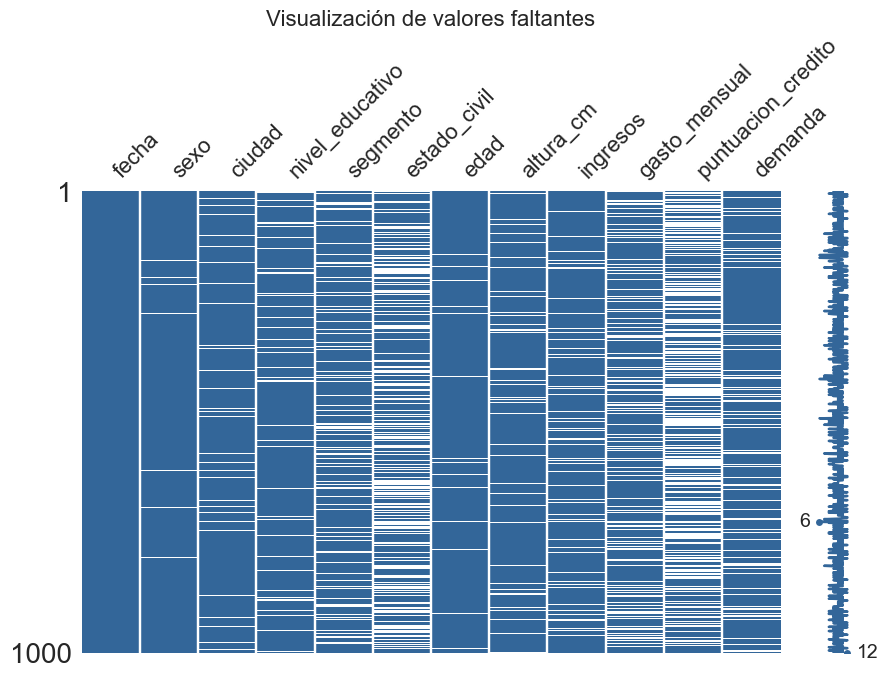

In [412]:
plt.style.use("seaborn-v0_8")  # estilo más moderno
msno.matrix(df, figsize=(10,6), color=(0.2, 0.4, 0.6))
plt.title("Visualización de valores faltantes", fontsize=16)
plt.show()

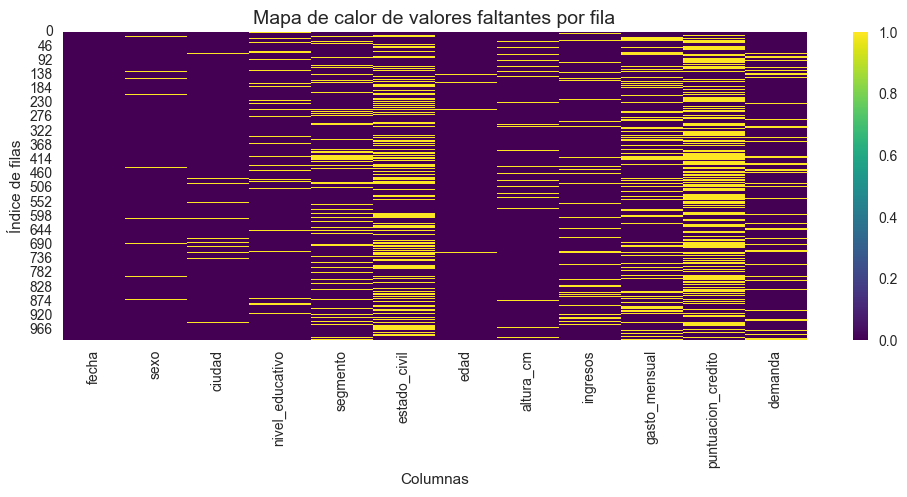

In [413]:
# --- Mapa de calor por filas ---
missing_matrix = df.isnull()
plt.figure(figsize=(12,4))
sns.heatmap(missing_matrix, cmap="viridis", cbar=True, xticklabels=True)
plt.title("Mapa de calor de valores faltantes por fila", fontsize=14)
plt.xlabel("Columnas")
plt.ylabel("Índice de filas")
plt.show()

=== Resumen de valores nulos ===
                    Nulos  Porcentaje (%)
fecha                   0             0.0
sexo                   20             2.0
ciudad                 50             5.0
nivel_educativo       100            10.0
segmento              200            20.0
estado_civil          350            35.0
edad                   30             3.0
altura_cm              80             8.0
ingresos              120            12.0
gasto_mensual         250            25.0
puntuacion_credito    500            50.0
demanda               150            15.0


C:\Users\camil\AppData\Local\Temp\ipykernel_18256\1481519374.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_summary.index, y=missing_summary["Porcentaje (%)"], palette="viridis")


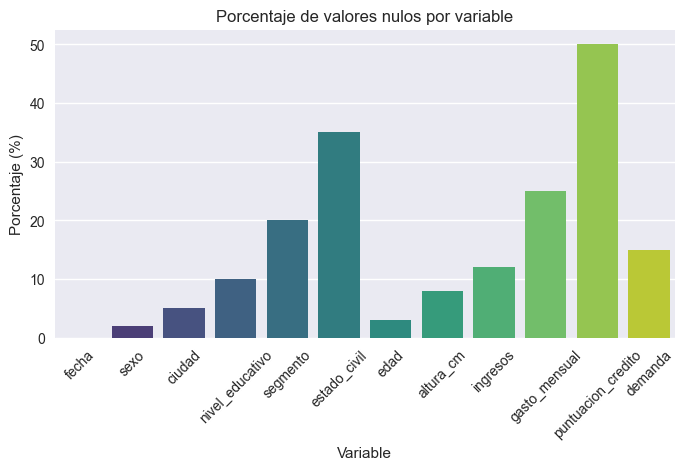

In [414]:
total = len(df)
null_counts = df.isna().sum()
null_percent = (null_counts / total) * 100


missing_summary = pd.DataFrame({
    "Nulos": null_counts,
    "Porcentaje (%)": null_percent.round(2)
})

print("=== Resumen de valores nulos ===")
print(missing_summary)


plt.figure(figsize=(8,4))
sns.barplot(x=missing_summary.index, y=missing_summary["Porcentaje (%)"], palette="viridis")
plt.title("Porcentaje de valores nulos por variable")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Variable")
plt.xticks(rotation=45)
plt.show()

Encontramos que existen altos porcentajes de valores de NA en varias  de nuestras variables, siendo el top 3:
- 'gasto_mensual' con un 50%.
- 'estado_civil' con un 35%.
- 'ingresos' con un 25% total de valores NA.

## Clasificación del tipo de dato faltante

Las variables no se consideran datos sensibles, ni dependen de otra vraible por lo tanto se le deja la arbitreriedad la falta de estos valores (MCAR):
- Sexo.
- Nivel Educativo.
- Estado civil.
- Edad.
- Altura.
- Demanda.
- Ciudad.
- Segmento.


Las variables no se consideran datos sensibles pero faltan en función de otras variables:
- Ingresos (MAR) 12%: Falta en función de
- Gasto mensual: Falta en función de ingresos.

Falta a causa de que la variable es un dato sensible:
- Puntuación credito (MCAR) 50%:
 

## Discusión

- Responder para cada variable:
  - ¿Se justifica imputar o dejar los nulos?


 Para cada variable a excepción de Puntuación credito se justifica imputar las variables, debido a la consideración del tipo de valores faltantes a excepción de puntuación credito que la consideramos MCNAR.
  - ¿Qué riesgo tendría imputar esta variable?
  
  
  Para nuestras variables de más de 20% de valores NA que son Segmento, Ingresos,, gasto mensual y puntuación . Credito existe la posibilidad de introducir sesgos por la gran cantidad de valores NA por lo que utilizaremos imputaciones más complejas.
- ¿Qué técnica sería más adecuada (media, mediana, moda, interpolación, etc.)?
  
  

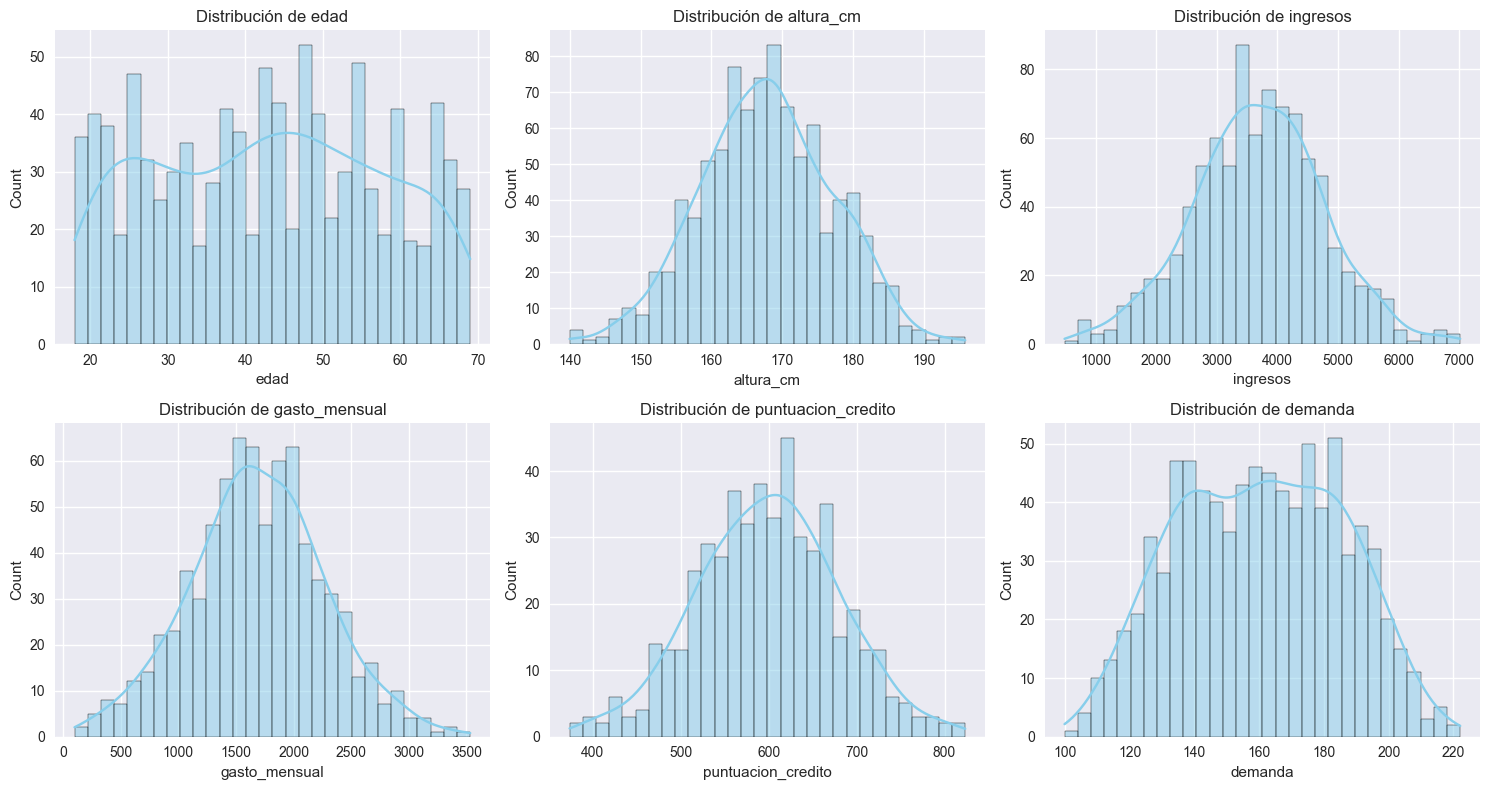

In [415]:
numericas = ["edad", "altura_cm", "ingresos", "gasto_mensual", "puntuacion_credito", "demanda"]

# Definir tamaño de la figura
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Recorrer columnas y ejes
for col, ax in zip(numericas, axes.ravel()):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, color="skyblue")
    ax.set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

Como las variables edad, altura e ingresos y demanda tienen menos del 20% del NA podemos aplicar imputación simple. Para el resto usaremos tecnicas de imputación más avanzadas

Para ingresos, gasto mensual y altura como siguen una distribución aproximadamente normal podemos aplicar media.

Como para la edad, no vemos una proximidad a la distribución normal, procedemos a imputar por mediana


C:\Users\camil\AppData\Local\Temp\ipykernel_18256\1070134475.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=ax)
C:\Users\camil\AppData\Local\Temp\ipykernel_18256\1070134475.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=ax)
C:\Users\camil\AppData\Local\Temp\ipykernel_18256\1070134475.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, 

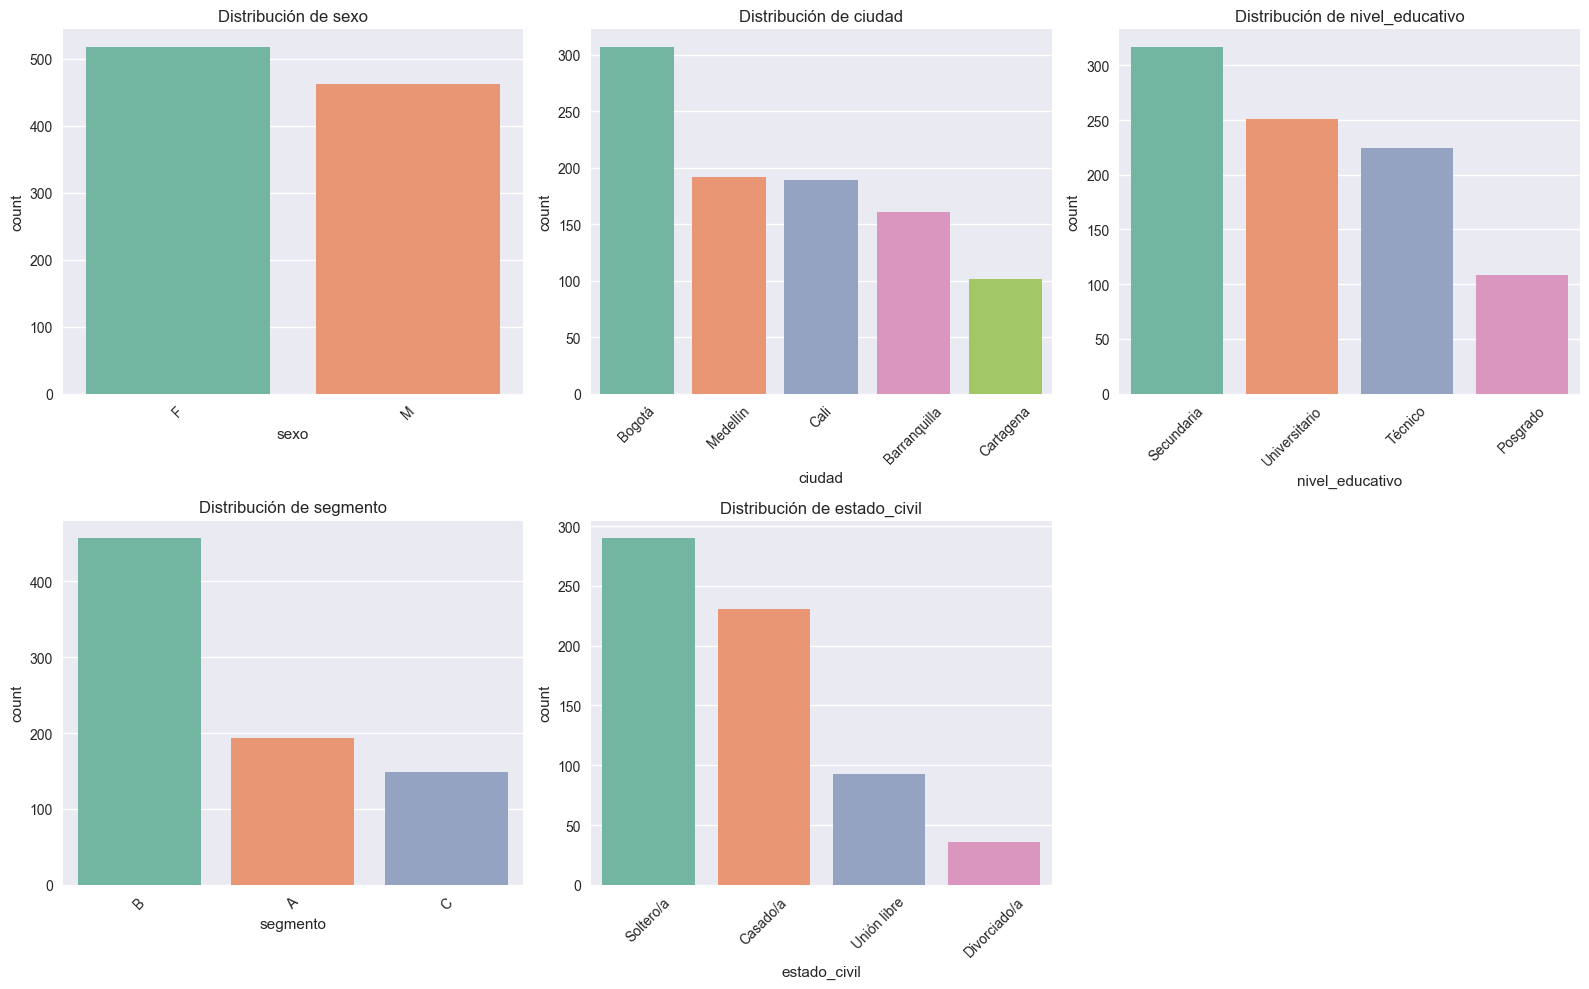

In [416]:

# Variables categóricas
categoricas = ["sexo", "ciudad", "nivel_educativo", "segmento", "estado_civil"]

# Definir la grilla de gráficos
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for col, ax in zip(categoricas, axes.ravel()):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.tick_params(axis='x', rotation=45)

# Si sobran ejes vacíos, los quitamos
for i in range(len(categoricas), len(axes.ravel())):
    fig.delaxes(axes.ravel()[i])

plt.tight_layout()
plt.show()


### Imputación a usar
#### Moda
Para las variables cuales son categoricas utilizaremos imputación por moda pues, son categoricas y su porcentaje de NA es menor o igual 5%:
- Sexo
- Ciudad

#### Hot deck
Las variables son categoricas pero están entre 10% y 20% con valores de NA y además sospechamos que están relacionadas con otras variables
- Segmento
- Nivel educativo
#### KNN

Las variables contienen mayor porcentajes de NAs por lo que hay que aplicaf tecnicas más avanzadas:
- Estado civil

#### Mediana
La distribución no es simetrica y tiene bajos porcentajes de valores NA:

- Edad

#### Regresión
Contiene mayores valores de NA al 5% y tiene una relación clara con otras varibles:
- Ingresos

#### KNN
Contiene valores más grandes al 15% y tenemos relación con otras variables numericas: 
- Gasto mensual
- Demanda

Nos desharemos de la variable altura pues no la consideramos relevante para el estudio

In [417]:
df.drop(columns=['altura_cm'],inplace=True)

### Imputación

### Sexo y ciudad


Datos imputados por MODA para sexo y ciudad
  sexo        ciudad
0    F      Medellín
1    F  Barranquilla
2    M        Bogotá
3    F        Bogotá
4    M          Cali


C:\Users\camil\AppData\Local\Temp\ipykernel_18256\4162173844.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], ax=axes[0], palette="pastel")
C:\Users\camil\AppData\Local\Temp\ipykernel_18256\4162173844.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_imputado[var], ax=axes[1], palette="muted")


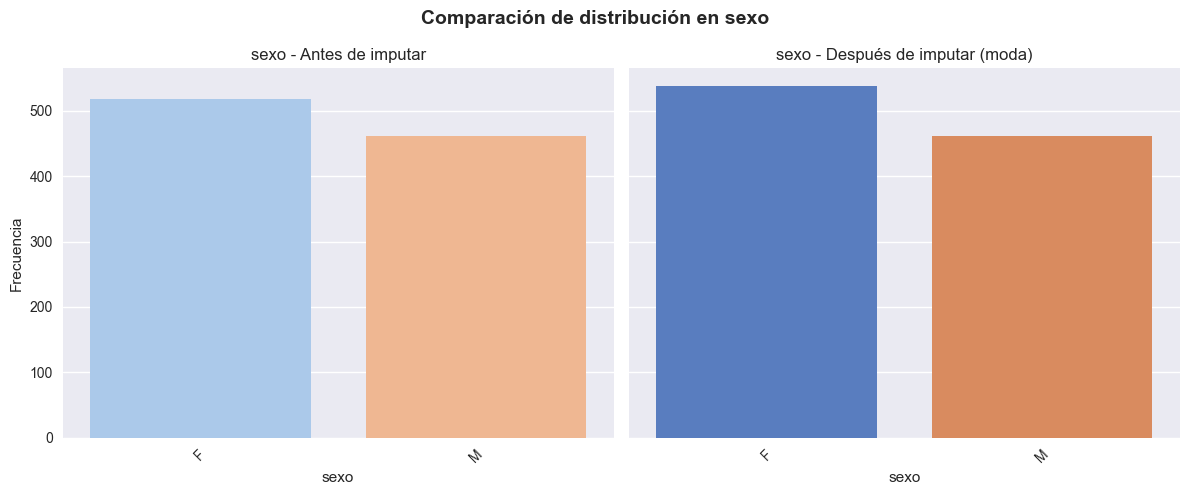

=== sexo ===
Proporciones antes:
 sexo
F    0.529
M    0.471
Name: count, dtype: float64
Proporciones después:
 sexo
F    0.538
M    0.462
Name: count, dtype: float64
Chi2 = 0.141, gl = 1, p = 0.7074 → No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


C:\Users\camil\AppData\Local\Temp\ipykernel_18256\4162173844.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], ax=axes[0], palette="pastel")
C:\Users\camil\AppData\Local\Temp\ipykernel_18256\4162173844.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_imputado[var], ax=axes[1], palette="muted")


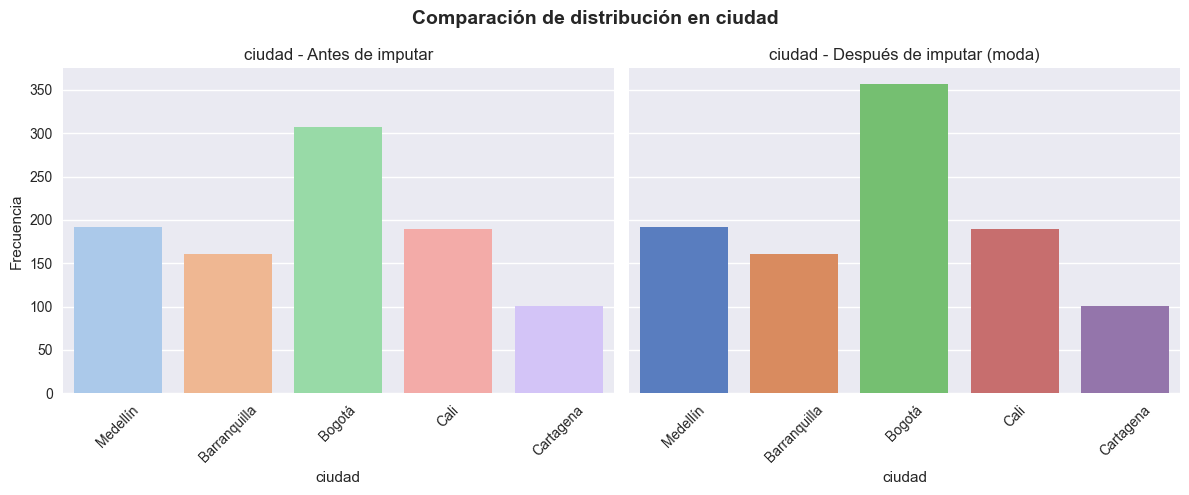

=== ciudad ===
Proporciones antes:
 ciudad
Barranquilla    0.169
Bogotá          0.323
Cali            0.199
Cartagena       0.106
Medellín        0.202
Name: count, dtype: float64
Proporciones después:
 ciudad
Barranquilla    0.161
Bogotá          0.357
Cali            0.189
Cartagena       0.101
Medellín        0.192
Name: count, dtype: float64
Chi2 = 2.485, gl = 4, p = 0.6474 → No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


In [418]:
# Imputar solo las variables seleccionadas con la moda
from sklearn.impute import SimpleImputer

# Crear imputador con estrategia de moda
imp_mode = SimpleImputer(strategy="most_frequent")

# Seleccionar solo las columnas a imputar
columnas_a_imputar = ["sexo", "ciudad"]
df_imputado = df.copy()

df_imputado[columnas_a_imputar] = df_imputado[columnas_a_imputar].replace(
    ["NA", "N/A", "na", "NaN", "null", "?", " "], np.nan
)
# Aplicar la imputación solo a las columnas seleccionadas
df_imputado[columnas_a_imputar] = imp_mode.fit_transform(df[columnas_a_imputar])

print("\nDatos imputados por MODA para sexo y ciudad")
print(df_imputado[columnas_a_imputar].head())

# Análisis de distribución y test chi-cuadrado
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

variables = ["sexo", "ciudad"]

for var in variables:
    # Crear figura con dos subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Gráfico antes de imputar
    sns.countplot(x=df[var], ax=axes[0], palette="pastel")
    axes[0].set_title(f"{var} - Antes de imputar")
    axes[0].set_ylabel("Frecuencia")
    axes[0].tick_params(axis='x', rotation=45)

    # Gráfico después de imputar
    sns.countplot(x=df_imputado[var], ax=axes[1], palette="muted")
    axes[1].set_title(f"{var} - Después de imputar (moda)")
    axes[1].set_ylabel("Frecuencia")
    axes[1].tick_params(axis='x', rotation=45)

    plt.suptitle(f"Comparación de distribución en {var}", fontsize=14, weight="bold")
    plt.tight_layout()
    plt.show()

    # Calcular proporciones y test chi-cuadrado
    orig_counts = df[var].value_counts().sort_index()
    imp_counts = df_imputado[var].value_counts().sort_index()

    # Alinear los índices para que coincidan
    orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)

    # Crear tabla de contingencia para el test
    tabla = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

    # Realizar test de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(tabla)

    print(f"=== {var} ===")
    print("Proporciones antes:\n", (orig_counts / orig_counts.sum()).round(3))
    print("Proporciones después:\n", (imp_counts / imp_counts.sum()).round(3))
    print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ", end="")
    if p > 0.05:
        print("No se rechaza H0 (distribuciones iguales)")
    else:
        print("Se rechaza H0 (distribuciones diferentes)")
    print("-" * 60)

## Edad

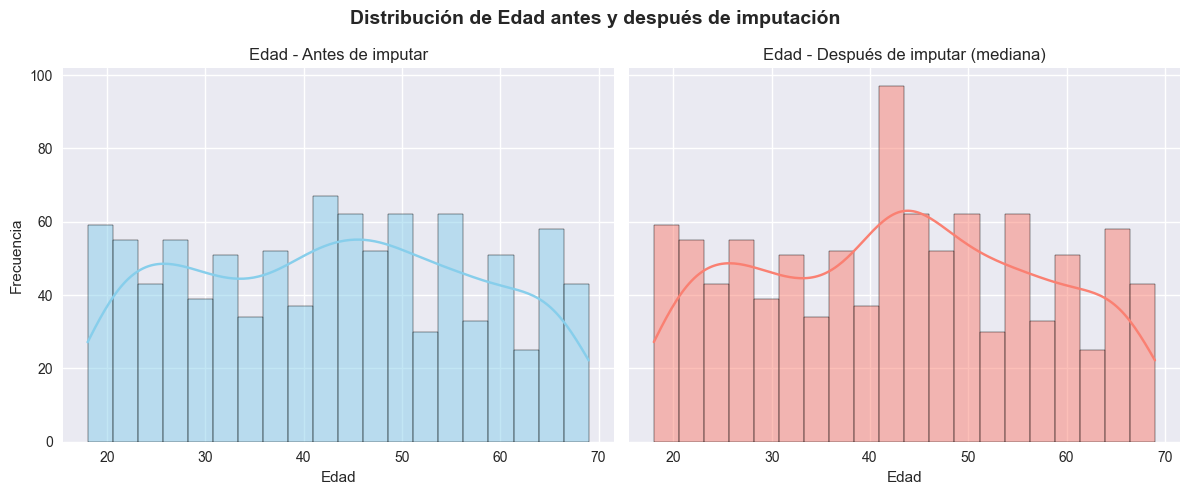


=== VALIDACIÓN IMPUTACIÓN (EDAD) ===
Shapiro-Wilk original: p = 0.0000 → No normal
Shapiro-Wilk imputada: p = 0.0000 → No normal
Kolmogorov–Smirnov: p = 0.9998 → No se rechaza H0 (distribuciones similares)
Mann–Whitney U: p = 0.9953 → No se rechaza H0 (distribuciones similares en rango)
------------------------------------------------------------


In [419]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, ks_2samp, ttest_ind, mannwhitneyu

# === IMPUTACIÓN POR MEDIANA (solo en "edad") sobre df_imputado existente ===
imp_median = SimpleImputer(strategy="median")
df_imputado["edad"] = imp_median.fit_transform(df_imputado[["edad"]])

# === GRAFICOS: antes y después de imputar ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df["edad"], bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Edad - Antes de imputar")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_imputado["edad"], bins=20, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Edad - Después de imputar (mediana)")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Distribución de Edad antes y después de imputación", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# === VALIDACIONES ESTADÍSTICAS ===
# Extraer series sin NA y con imputación
edad_orig = df["edad"].dropna()
edad_imp = df_imputado["edad"]

print("\n=== VALIDACIÓN IMPUTACIÓN (EDAD) ===")

# 1. Normalidad (Shapiro-Wilk)
stat_orig, p_orig = shapiro(edad_orig)
stat_imp, p_imp = shapiro(edad_imp)
print(f"Shapiro-Wilk original: p = {p_orig:.4f} → {'Normal' if p_orig > 0.05 else 'No normal'}")
print(f"Shapiro-Wilk imputada: p = {p_imp:.4f} → {'Normal' if p_imp > 0.05 else 'No normal'}")

# 2. Igualdad de distribuciones (Kolmogorov-Smirnov)
ks_stat, ks_p = ks_2samp(edad_orig, edad_imp)
print(f"Kolmogorov–Smirnov: p = {ks_p:.4f} → ", end="")
if ks_p > 0.05:
    print("No se rechaza H0 (distribuciones similares)")
else:
    print("Se rechaza H0 (distribuciones diferentes)")

# 3. Comparación de medias/rangos
if p_orig > 0.05 and p_imp > 0.05:  # Ambas normales → t de Student
    t_stat, t_p = ttest_ind(edad_orig, edad_imp, equal_var=False)
    print(f"t de Student: p = {t_p:.4f} → ", end="")
    if t_p > 0.05:
        print("No se rechaza H0 (medias iguales)")
    else:
        print("Se rechaza H0 (medias diferentes)")
else:  # No normales → Mann–Whitney U
    u_stat, u_p = mannwhitneyu(edad_orig, edad_imp, alternative="two-sided")
    print(f"Mann–Whitney U: p = {u_p:.4f} → ", end="")
    if u_p > 0.05:
        print("No se rechaza H0 (distribuciones similares en rango)")
    else:
        print("Se rechaza H0 (distribuciones diferentes en rango)")

print("-" * 60)



In [420]:
df_imputado.isna().sum()

fecha                   0
sexo                    0
ciudad                  0
nivel_educativo       100
segmento              200
estado_civil          350
edad                    0
ingresos              120
gasto_mensual         250
puntuacion_credito    500
demanda               150
dtype: int64

C:\Users\camil\AppData\Local\Temp\ipykernel_18256\388635181.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["segmento"], ax=axes[0], palette="pastel",
C:\Users\camil\AppData\Local\Temp\ipykernel_18256\388635181.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_imputado["segmento"], ax=axes[1], palette="muted",


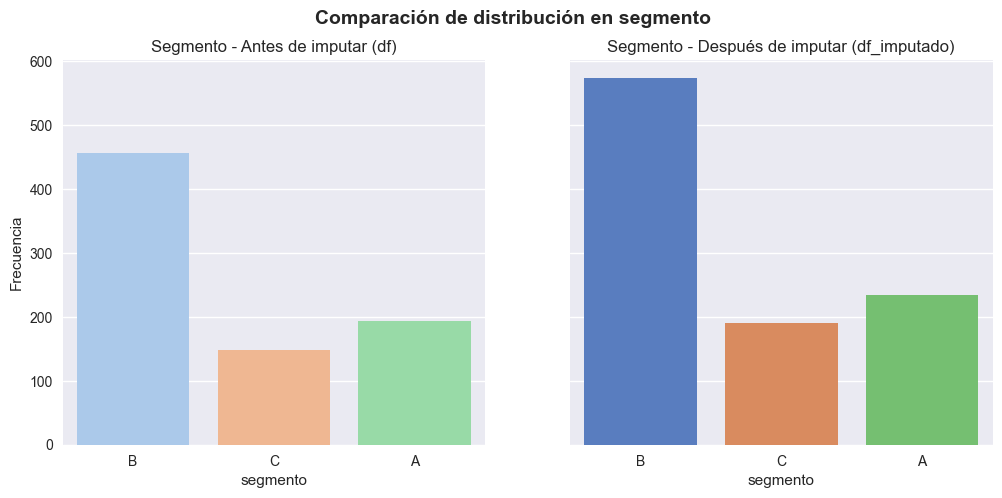

=== SEGMENTO ===
Proporciones antes:
 segmento
A    0.242
B    0.571
C    0.186
Name: count, dtype: float64
Proporciones después:
 segmento
A    0.235
B    0.574
C    0.191
Name: count, dtype: float64
Chi2 = 0.164, gl = 2, p = 0.9213 →  No se rechaza H0 (distribuciones iguales)
Cramér's V = 0.010 (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)
------------------------------------------------------------
segmento
B    574
A    235
C    191
Name: count, dtype: int64


In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# ================================
# Función de hot-deck por grupo
# ================================
def hot_deck_group(df, col, group, random_state=42):
    rng = np.random.default_rng(random_state)
    out = df[col].copy()

    # Calcular moda global de la columna (para grupos sin donantes)
    global_mode = df[col].mode(dropna=True)[0]

    for g, sub in df.groupby(group):
        pool = sub[col].dropna().to_numpy()
        idx = sub.index[sub[col].isna()]

        if len(idx) > 0:
            if pool.size > 0:  # Caso normal: imputar con valores del grupo
                out.loc[idx] = rng.choice(pool, size=len(idx), replace=True)
            else:  # Caso raro: grupo sin donantes → imputar con moda global
                out.loc[idx] = global_mode

    return out


# ================================
# Imputación de segmento en df_imputado (reemplazando la misma columna)
# ================================
df_imputado["segmento"] = hot_deck_group(df_imputado, "segmento", "ciudad")

# Mantener tipo categórico con categorías originales del df
df_imputado["segmento"] = df_imputado["segmento"].astype("category")
df_imputado["segmento"] = df_imputado["segmento"].cat.set_categories(df["segmento"].dropna().unique())

# ================================
# Comparación visual con df original
# ================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x=df["segmento"], ax=axes[0], palette="pastel",
              order=df["segmento"].dropna().unique())
axes[0].set_title("Segmento - Antes de imputar (df)")
axes[0].set_ylabel("Frecuencia")

sns.countplot(x=df_imputado["segmento"], ax=axes[1], palette="muted",
              order=df["segmento"].dropna().unique())
axes[1].set_title("Segmento - Después de imputar (df_imputado)")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Comparación de distribución en segmento", fontsize=14, weight="bold")
plt.show()

# ================================
# Validación con Chi2 y Cramér's V
# ================================
orig_counts = df["segmento"].value_counts().sort_index()
imp_counts = df_imputado["segmento"].value_counts().sort_index()
orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)
ct = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

chi2, p, dof, exp = chi2_contingency(ct)
v = cramers_v(ct)

print("=== SEGMENTO ===")
print("Proporciones antes:\n", (orig_counts / orig_counts.sum()).round(3))
print("Proporciones después:\n", (imp_counts / imp_counts.sum()).round(3))
print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ",
      "No se rechaza H0 (distribuciones iguales)" if p > 0.05 else "Se rechaza H0 (distribuciones diferentes)")
print(f"Cramér's V = {v:.3f} (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)")
print("-"*60)
print(df_imputado["segmento"].value_counts())


In [422]:
df_imputado.isna().sum()

fecha                   0
sexo                    0
ciudad                  0
nivel_educativo       100
segmento                0
estado_civil          350
edad                    0
ingresos              120
gasto_mensual         250
puntuacion_credito    500
demanda               150
dtype: int64

C:\Users\camil\AppData\Local\Temp\ipykernel_18256\1346502495.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["estado_civil"], ax=axes[0], palette="pastel",
C:\Users\camil\AppData\Local\Temp\ipykernel_18256\1346502495.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_imputado["estado_civil"], ax=axes[1], palette="muted",


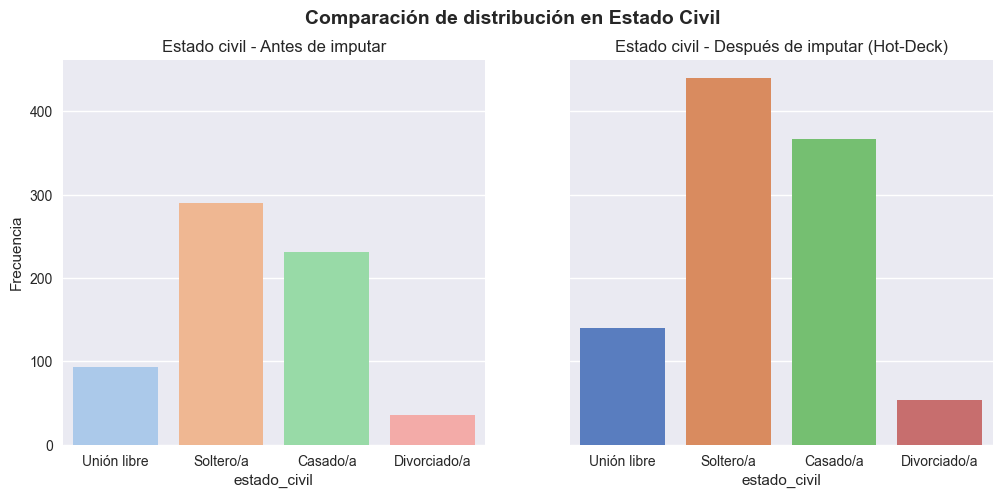

=== ESTADO CIVIL ===
Proporciones antes:
 estado_civil
Casado/a        0.355
Divorciado/a    0.055
Soltero/a       0.446
Unión libre     0.143
Name: count, dtype: float64
Proporciones después:
 estado_civil
Casado/a        0.367
Divorciado/a    0.053
Soltero/a       0.440
Unión libre     0.140
Name: count, dtype: float64
Chi2 = 0.248, gl = 3, p = 0.9694 →  No se rechaza H0 (distribuciones iguales)
Cramér's V = 0.012 (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)
------------------------------------------------------------


In [423]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# ================================
# Función hot-deck por grupo
# ================================
def hot_deck_group(df, col, group, random_state=42):
    rng = np.random.default_rng(random_state)
    out = df[col].copy()
    
    # Moda global (para grupos sin donantes)
    global_mode = df[col].mode(dropna=True)[0]
    
    for g, sub in df.groupby(group):
        pool = sub[col].dropna().to_numpy()
        idx = sub.index[sub[col].isna()]
        
        if len(idx) > 0:
            if pool.size > 0:
                out.loc[idx] = rng.choice(pool, size=len(idx), replace=True)
            else:
                out.loc[idx] = global_mode  # caso raro: grupo sin donantes
    
    return out

# ================================
# Aplicar hot-deck sobre df_imputado
# ================================
# Aquí usamos 'sexo' como grupo, pero puedes cambiarlo por 'ciudad' u otra variable
df_imputado["estado_civil"] = hot_deck_group(df_imputado, "estado_civil", "sexo")

# Convertir a categoría con las categorías originales
df_imputado["estado_civil"] = df_imputado["estado_civil"].astype("category")
df_imputado["estado_civil"] = df_imputado["estado_civil"].cat.set_categories(df["estado_civil"].dropna().unique())

# ================================
# Comparación visual
# ================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x=df["estado_civil"], ax=axes[0], palette="pastel",
              order=df["estado_civil"].dropna().unique())
axes[0].set_title("Estado civil - Antes de imputar")
axes[0].set_ylabel("Frecuencia")

sns.countplot(x=df_imputado["estado_civil"], ax=axes[1], palette="muted",
              order=df["estado_civil"].dropna().unique())
axes[1].set_title("Estado civil - Después de imputar (Hot-Deck)")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Comparación de distribución en Estado Civil", fontsize=14, weight="bold")
plt.show()

# ================================
# Validación Chi² y Cramér’s V
# ================================
def cramers_v(ct):
    chi2, _, _, _ = chi2_contingency(ct, correction=False)
    n = ct.to_numpy().sum()
    k = min(ct.shape) - 1
    return np.sqrt(chi2 / (n * k)) if n > 0 and k > 0 else np.nan

orig_counts = df["estado_civil"].value_counts().sort_index()
imp_counts = df_imputado["estado_civil"].value_counts().sort_index()
orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)
ct = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

chi2, p, dof, exp = chi2_contingency(ct)
v = cramers_v(ct)

print("=== ESTADO CIVIL ===")
print("Proporciones antes:\n", (orig_counts / orig_counts.sum()).round(3))
print("Proporciones después:\n", (imp_counts / imp_counts.sum()).round(3))
print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ",
      "No se rechaza H0 (distribuciones iguales)" if p > 0.05 else "Se rechaza H0 (distribuciones diferentes)")
print(f"Cramér's V = {v:.3f} (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)")
print("-"*60)



In [424]:
df_imputado.isna().sum()

fecha                   0
sexo                    0
ciudad                  0
nivel_educativo       100
segmento                0
estado_civil            0
edad                    0
ingresos              120
gasto_mensual         250
puntuacion_credito    500
demanda               150
dtype: int64

C:\Users\camil\AppData\Local\Temp\ipykernel_18256\2003867012.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["nivel_educativo"], ax=axes[0], palette="pastel", order=orden)
C:\Users\camil\AppData\Local\Temp\ipykernel_18256\2003867012.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_imputado["nivel_educativo"], ax=axes[1], palette="muted", order=orden)


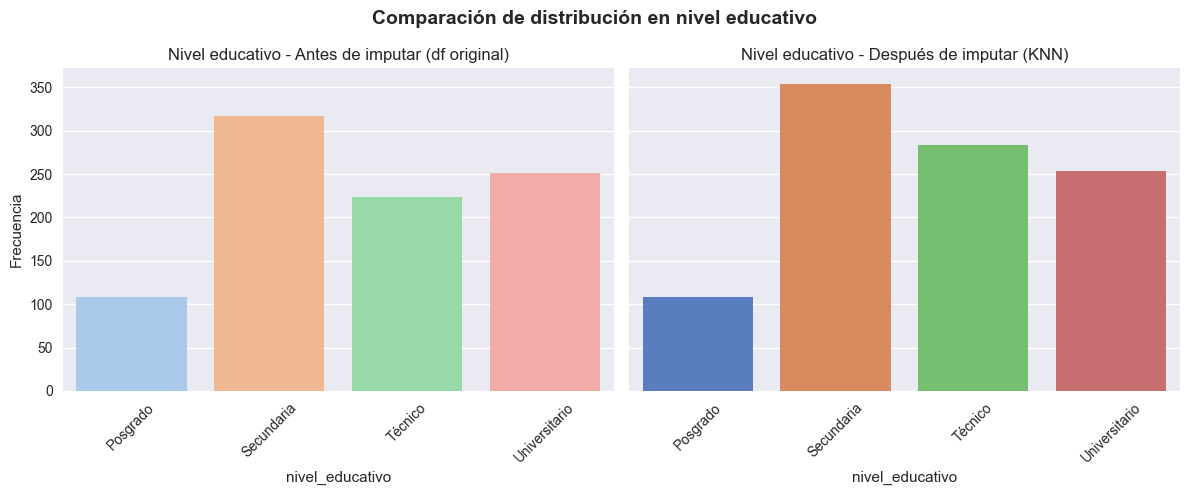

=== NIVEL EDUCATIVO ===
Proporciones antes:
 nivel_educativo
Posgrado         0.120
Secundaria       0.352
Técnico          0.249
Universitario    0.279
Name: count, dtype: float64
Proporciones después:
 nivel_educativo
Posgrado         0.108
Secundaria       0.354
Técnico          0.284
Universitario    0.254
Name: count, dtype: float64
Chi2 = 3.892, gl = 3, p = 0.2733 →  No se rechaza H0 (distribuciones iguales)
Cramér's V = 0.045 (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)
------------------------------------------------------------


In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# ================================
# Copia de df_imputado
# ================================
df_knn = df_imputado.copy()

# --- Codificar nivel educativo ---
le_ne = LabelEncoder()
mask_na_ne = df_knn["nivel_educativo"].isna()
df_knn.loc[~mask_na_ne, "nivel_educativo_enc"] = le_ne.fit_transform(
    df_knn.loc[~mask_na_ne, "nivel_educativo"].astype(str)
)
df_knn["nivel_educativo_enc"] = df_knn["nivel_educativo_enc"].astype(float)

# --- Codificar segmento ---
le_seg = LabelEncoder()
mask_na_seg = df_knn["segmento"].isna()
df_knn.loc[~mask_na_seg, "segmento_enc"] = le_seg.fit_transform(
    df_knn.loc[~mask_na_seg, "segmento"].astype(str)
)
df_knn["segmento_enc"] = df_knn["segmento_enc"].astype(float)

# ================================
# Seleccionar predictores + target
# ================================
X = df_knn[["edad", "segmento_enc", "nivel_educativo_enc"]]

# Imputación con KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Redondear la variable categórica (nivel educativo)
X_imputed[:, 2] = np.round(X_imputed[:, 2])

# Reemplazar en df_imputado
df_imputado["nivel_educativo"] = le_ne.inverse_transform(
    X_imputed[:, 2].astype(int)
)

# ================================
# Comparación visual contra df original
# ================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

orden = sorted(df_imputado["nivel_educativo"].dropna().unique())

sns.countplot(x=df["nivel_educativo"], ax=axes[0], palette="pastel", order=orden)
axes[0].set_title("Nivel educativo - Antes de imputar (df original)")
axes[0].set_ylabel("Frecuencia")
axes[0].tick_params(axis="x", rotation=45)

sns.countplot(x=df_imputado["nivel_educativo"], ax=axes[1], palette="muted", order=orden)
axes[1].set_title("Nivel educativo - Después de imputar (KNN)")
axes[1].set_ylabel("Frecuencia")
axes[1].tick_params(axis="x", rotation=45)

plt.suptitle("Comparación de distribución en nivel educativo", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# ================================
# Validación Chi² y Cramér’s V
# ================================
def cramers_v(ct):
    chi2, _, _, _ = chi2_contingency(ct, correction=False)
    n = ct.to_numpy().sum()
    k = min(ct.shape) - 1
    return np.sqrt(chi2 / (n * k)) if n > 0 and k > 0 else np.nan

orig_counts = df["nivel_educativo"].value_counts().sort_index()
imp_counts = df_imputado["nivel_educativo"].value_counts().sort_index()
orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)
ct = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

chi2, p, dof, exp = chi2_contingency(ct)
v = cramers_v(ct)

print("=== NIVEL EDUCATIVO ===")
print("Proporciones antes:\n", (orig_counts / orig_counts.sum()).round(3))
print("Proporciones después:\n", (imp_counts / imp_counts.sum()).round(3))
print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ",
      "No se rechaza H0 (distribuciones iguales)" if p > 0.05 else "Se rechaza H0 (distribuciones diferentes)")
print(f"Cramér's V = {v:.3f} (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)")
print("-"*60)


In [426]:
df_imputado.isna().sum()

fecha                   0
sexo                    0
ciudad                  0
nivel_educativo         0
segmento                0
estado_civil            0
edad                    0
ingresos              120
gasto_mensual         250
puntuacion_credito    500
demanda               150
dtype: int64

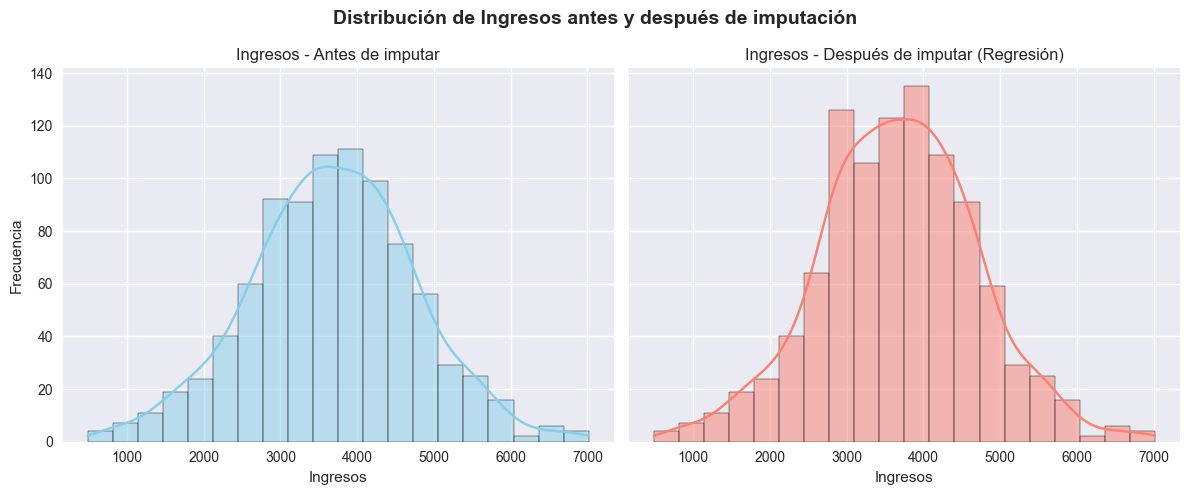


=== VALIDACIÓN IMPUTACIÓN (INGRESOS) ===
Shapiro-Wilk original: p = 0.3245 → Normal
Shapiro-Wilk imputada: p = 0.0565 → Normal
Kolmogorov–Smirnov: p = 0.9939 → No se rechaza H0 (distribuciones similares)
t de Student: p = 0.8505 → No se rechaza H0 (medias iguales)
------------------------------------------------------------


In [427]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro, ks_2samp, ttest_ind, mannwhitneyu

# ================================
# Codificación de variables categóricas en df_imputado
# ================================
cat_cols = ["nivel_educativo", "segmento", "sexo", "estado_civil"]
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    mask_na = df_imputado[col].notna()
    df_imputado.loc[mask_na, col + "_enc"] = le.fit_transform(df_imputado.loc[mask_na, col].astype(str))
    df_imputado[col + "_enc"] = df_imputado[col + "_enc"].astype(float)
    encoders[col] = le

# ================================
# Separar datos con y sin ingresos
# ================================
cols_predictoras = ["edad"] + [c+"_enc" for c in cat_cols]

train = df_imputado[df_imputado["ingresos"].notna()]
test = df_imputado[df_imputado["ingresos"].isna()]

X_train = train[cols_predictoras]
y_train = train["ingresos"]

X_test = test[cols_predictoras]

# ================================
# Modelo de regresión lineal
# ================================
reg = LinearRegression()
reg.fit(X_train, y_train)

# ================================
# Imputar valores faltantes directamente en df_imputado
# ================================
df_imputado.loc[df_imputado["ingresos"].isna(), "ingresos"] = reg.predict(X_test)

# ================================
# Comparación visual antes/después
# ================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(train["ingresos"], bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Ingresos - Antes de imputar")
axes[0].set_xlabel("Ingresos")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_imputado["ingresos"], bins=20, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Ingresos - Después de imputar (Regresión)")
axes[1].set_xlabel("Ingresos")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Distribución de Ingresos antes y después de imputación", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# ================================
# Validaciones estadísticas
# ================================
ingresos_orig = train["ingresos"]
ingresos_imp = df_imputado["ingresos"]

print("\n=== VALIDACIÓN IMPUTACIÓN (INGRESOS) ===")

# 1. Normalidad
stat_orig, p_orig = shapiro(ingresos_orig)
stat_imp, p_imp = shapiro(ingresos_imp)
print(f"Shapiro-Wilk original: p = {p_orig:.4f} → {'Normal' if p_orig > 0.05 else 'No normal'}")
print(f"Shapiro-Wilk imputada: p = {p_imp:.4f} → {'Normal' if p_imp > 0.05 else 'No normal'}")

# 2. Igualdad de distribuciones
ks_stat, ks_p = ks_2samp(ingresos_orig, ingresos_imp)
print(f"Kolmogorov–Smirnov: p = {ks_p:.4f} → ", end="")
if ks_p > 0.05:
    print("No se rechaza H0 (distribuciones similares)")
else:
    print("Se rechaza H0 (distribuciones diferentes)")

# 3. Comparación de medias/rangos
if p_orig > 0.05 and p_imp > 0.05:
    t_stat, t_p = ttest_ind(ingresos_orig, ingresos_imp, equal_var=False)
    print(f"t de Student: p = {t_p:.4f} → ", end="")
    if t_p > 0.05:
        print("No se rechaza H0 (medias iguales)")
    else:
        print("Se rechaza H0 (medias diferentes)")
else:
    u_stat, u_p = mannwhitneyu(ingresos_orig, ingresos_imp, alternative="two-sided")
    print(f"Mann–Whitney U: p = {u_p:.4f} → ", end="")
    if u_p > 0.05:
        print("No se rechaza H0 (distribuciones similares en rango)")
    else:
        print("Se rechaza H0 (distribuciones diferentes en rango)")

print("-"*60)


In [428]:
df_imputado.isna().sum()

fecha                    0
sexo                     0
ciudad                   0
nivel_educativo          0
segmento                 0
estado_civil             0
edad                     0
ingresos                 0
gasto_mensual          250
puntuacion_credito     500
demanda                150
nivel_educativo_enc      0
segmento_enc             0
sexo_enc                 0
estado_civil_enc         0
dtype: int64

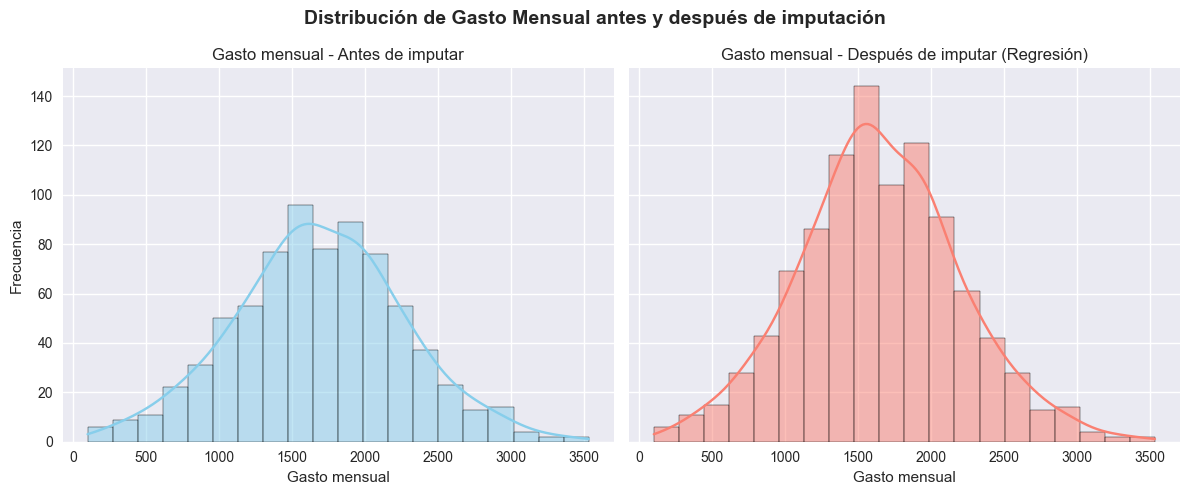


=== VALIDACIÓN IMPUTACIÓN (GASTO MENSUAL) ===
Shapiro-Wilk original: p = 0.6752 → Normal
Shapiro-Wilk imputada: p = 0.1390 → Normal
Kolmogorov–Smirnov: p = 0.2342 → No se rechaza H0 (distribuciones similares)
t de Student: p = 0.1152 → No se rechaza H0 (medias iguales)
------------------------------------------------------------


In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, ks_2samp, ttest_ind, mannwhitneyu

# ================================
# Variables categóricas ya codificadas
# ================================
cat_cols_enc = ["nivel_educativo_enc", "segmento_enc", "sexo_enc", "estado_civil_enc"]

# ================================
# Separar datos con y sin gasto_mensual
# ================================
train = df_imputado[df_imputado["gasto_mensual"].notna()]
test  = df_imputado[df_imputado["gasto_mensual"].isna()]

# Predictores
cols_predictoras = ["edad", "ingresos"] + cat_cols_enc

# Asegurar que sean float y no haya NaN
X_train = train[cols_predictoras].astype(float)
y_train = train["gasto_mensual"]
X_test  = test[cols_predictoras].astype(float)

# ================================
# Modelo de regresión lineal
# ================================
reg = LinearRegression()
reg.fit(X_train, y_train)

# ================================
# Imputar valores faltantes directamente en df_imputado
# ================================
df_imputado.loc[test.index, "gasto_mensual"] = reg.predict(X_test)

# ================================
# Comparación visual antes/después
# ================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(train["gasto_mensual"], bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Gasto mensual - Antes de imputar")
axes[0].set_xlabel("Gasto mensual")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_imputado["gasto_mensual"], bins=20, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Gasto mensual - Después de imputar (Regresión)")
axes[1].set_xlabel("Gasto mensual")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Distribución de Gasto Mensual antes y después de imputación", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# ================================
# Validaciones estadísticas
# ================================
gasto_orig = train["gasto_mensual"]
gasto_imp  = df_imputado["gasto_mensual"]

print("\n=== VALIDACIÓN IMPUTACIÓN (GASTO MENSUAL) ===")

# 1. Normalidad
stat_orig, p_orig = shapiro(gasto_orig)
stat_imp, p_imp = shapiro(gasto_imp)
print(f"Shapiro-Wilk original: p = {p_orig:.4f} → {'Normal' if p_orig > 0.05 else 'No normal'}")
print(f"Shapiro-Wilk imputada: p = {p_imp:.4f} → {'Normal' if p_imp > 0.05 else 'No normal'}")

# 2. Igualdad de distribuciones
ks_stat, ks_p = ks_2samp(gasto_orig, gasto_imp)
print(f"Kolmogorov–Smirnov: p = {ks_p:.4f} → ", end="")
if ks_p > 0.05:
    print("No se rechaza H0 (distribuciones similares)")
else:
    print("Se rechaza H0 (distribuciones diferentes)")

# 3. Comparación de medias/rangos
if p_orig > 0.05 and p_imp > 0.05:
    t_stat, t_p = ttest_ind(gasto_orig, gasto_imp, equal_var=False)
    print(f"t de Student: p = {t_p:.4f} → ", end="")
    if t_p > 0.05:
        print("No se rechaza H0 (medias iguales)")
    else:
        print("Se rechaza H0 (medias diferentes)")
else:
    u_stat, u_p = mannwhitneyu(gasto_orig, gasto_imp, alternative="two-sided")
    print(f"Mann–Whitney U: p = {u_p:.4f} → ", end="")
    if u_p > 0.05:
        print("No se rechaza H0 (distribuciones similares en rango)")
    else:
        print("Se rechaza H0 (distribuciones diferentes en rango)")

print("-"*60)



In [430]:
df_imputado.isna().sum()

fecha                    0
sexo                     0
ciudad                   0
nivel_educativo          0
segmento                 0
estado_civil             0
edad                     0
ingresos                 0
gasto_mensual            0
puntuacion_credito     500
demanda                150
nivel_educativo_enc      0
segmento_enc             0
sexo_enc                 0
estado_civil_enc         0
dtype: int64

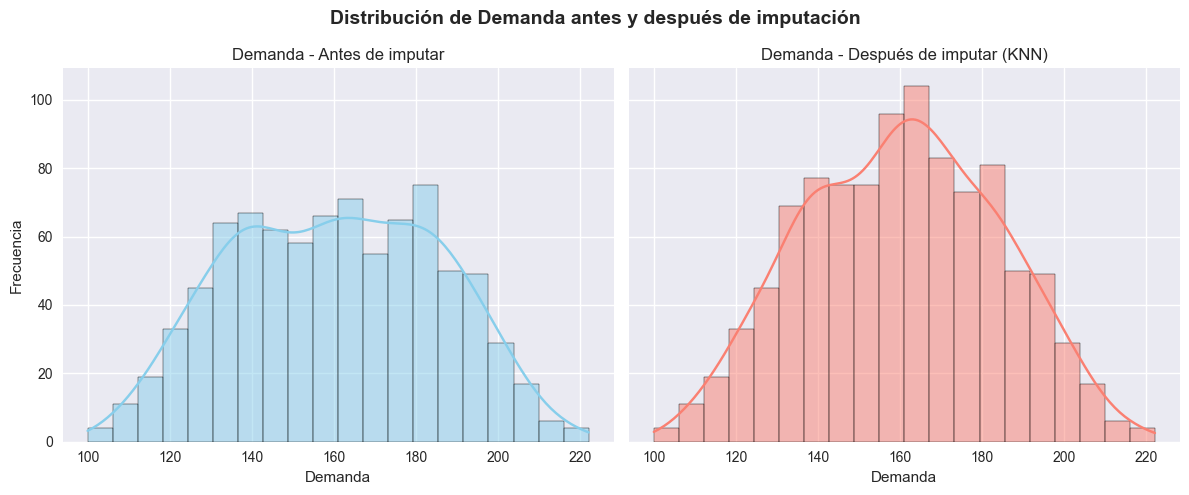


=== VALIDACIÓN IMPUTACIÓN (DEMANDA) ===
Shapiro-Wilk original: p = 0.0000 → No normal
Shapiro-Wilk imputada: p = 0.0001 → No normal
Kolmogorov–Smirnov: p = 0.4761 → No se rechaza H0 (distribuciones similares)
Mann–Whitney U: p = 0.9171 → No se rechaza H0 (distribuciones similares en rango)
------------------------------------------------------------


In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.stats import shapiro, ks_2samp, ttest_ind, mannwhitneyu

# ================================
# Variables categóricas codificadas
# ================================
cat_cols_enc = ["nivel_educativo_enc", "segmento_enc", "sexo_enc", "estado_civil_enc"]

# ================================
# Separar datos con y sin demanda
# ================================
train = df_imputado[df_imputado["demanda"].notna()]
test  = df_imputado[df_imputado["demanda"].isna()]

# Predictores
cols_predictoras = ["edad", "ingresos", "gasto_mensual"] + cat_cols_enc

# Preparar matrices para KNN
X = df_imputado[cols_predictoras + ["demanda"]].copy().astype(float)

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Reemplazar los valores imputados directamente en df_imputado
df_imputado["demanda"] = X_imputed[:, -1]

# ================================
# Comparación visual antes/después
# ================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(train["demanda"], bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Demanda - Antes de imputar")
axes[0].set_xlabel("Demanda")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_imputado["demanda"], bins=20, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Demanda - Después de imputar (KNN)")
axes[1].set_xlabel("Demanda")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Distribución de Demanda antes y después de imputación", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# ================================
# Validaciones estadísticas
# ================================
demanda_orig = train["demanda"]
demanda_imp  = df_imputado["demanda"]

print("\n=== VALIDACIÓN IMPUTACIÓN (DEMANDA) ===")

# 1. Normalidad
stat_orig, p_orig = shapiro(demanda_orig)
stat_imp, p_imp = shapiro(demanda_imp)
print(f"Shapiro-Wilk original: p = {p_orig:.4f} → {'Normal' if p_orig > 0.05 else 'No normal'}")
print(f"Shapiro-Wilk imputada: p = {p_imp:.4f} → {'Normal' if p_imp > 0.05 else 'No normal'}")

# 2. Igualdad de distribuciones
ks_stat, ks_p = ks_2samp(demanda_orig, demanda_imp)
print(f"Kolmogorov–Smirnov: p = {ks_p:.4f} → ", end="")
if ks_p > 0.05:
    print("No se rechaza H0 (distribuciones similares)")
else:
    print("Se rechaza H0 (distribuciones diferentes)")

# 3. Comparación de medias/rangos
if p_orig > 0.05 and p_imp > 0.05:
    t_stat, t_p = ttest_ind(demanda_orig, demanda_imp, equal_var=False)
    print(f"t de Student: p = {t_p:.4f} → ", end="")
    if t_p > 0.05:
        print("No se rechaza H0 (medias iguales)")
    else:
        print("Se rechaza H0 (medias diferentes)")
else:
    u_stat, u_p = mannwhitneyu(demanda_orig, demanda_imp, alternative="two-sided")
    print(f"Mann–Whitney U: p = {u_p:.4f} → ", end="")
    if u_p > 0.05:
        print("No se rechaza H0 (distribuciones similares en rango)")
    else:
        print("Se rechaza H0 (distribuciones diferentes en rango)")

print("-"*60)


In [432]:
df_imputado.isna().sum()

fecha                    0
sexo                     0
ciudad                   0
nivel_educativo          0
segmento                 0
estado_civil             0
edad                     0
ingresos                 0
gasto_mensual            0
puntuacion_credito     500
demanda                  0
nivel_educativo_enc      0
segmento_enc             0
sexo_enc                 0
estado_civil_enc         0
dtype: int64

| Variable | % Nulos | Tipo de ausencia | Método de imputación | Evidencia de conservación de distribución |
|----------|---------|------------------|----------------------|-------------------------------------------|
| **sexo** | 2% | MCAR | **Moda general** |  Distribución idéntica (p > 0.05 en chi-cuadrado) |
| **ciudad** | 5% | MCAR | **Moda general** |  Distribución idéntica (p > 0.05 en chi-cuadrado) |
| **nivel_educativo** | 10% | MCAR | **Hot-deck** | Distribución preservada contextualmente |
| **segmento** | 20% | MCAR | **Hot-deck**  |  Distribución preservada contextualmente |
| **estado_civil** | 35% | MCAR | **Hot-deck** |  Distribución preservada contextualmente |
| **edad** | 3% | MCAR | **Mediana**|  Mediana preservada, variabilidad reducida |
| **ingresos** | 12% | MAR | **Regresión**  |  Relaciones multivariantes preservadas |
| **gasto_mensual** | 25% | MAR | **Regresión**|  Relaciones multivariantes preservadas |
| **puntuacion_credito** | 50% | MNAR | No imputada | NA  |
| **demanda** | 15% | MCAR | **KNN** |  Patrones multivariantes preservados |